In [45]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [46]:
data = pd.read_csv("exp2022.csv", sep= ';') # 2008 até 2022
data.head(2)


,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0


In [47]:
columns = data.columns
for i in range(2, len(columns), 2):  # Começando de 2 para pular "Id" e "País"
    year = columns[i]
    year_dot = columns[i + 1]
    data[year] = data[year] + data[year_dot]
    data.drop(year_dot, axis=1, inplace=True)

In [48]:
data = data[["Id", "País"] + [str(year) for year in range(2008, 2023)]]
data.head()


,Id,País,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,121,25,0,0
2,3,"Alemanha, República Democrática",695712,618568,166381,180220,64531,327677,975001,55460,82121,103169,56176,29127,38866,9439,52997
3,4,Angola,96804,139021,223448,82890,11694,10873,35306,18997,42749,71850,1186,1410,0,0,8829
4,5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
data.to_csv("data.csv")

In [50]:
# 1. Transformar o DataFrame
melted_data = pd.melt(data, id_vars='País', var_name='Ano', value_name='Quantidade_litros')

# 2. Somar as quantidades de vinho exportado por país
total_exported = melted_data.groupby('País')['Quantidade_litros'].sum().reset_index()

# 3. Adicionar a coluna de país de origem
total_exported['País_origem'] = 'Brasil'

# Reorganizar as colunas
total_exported = total_exported[['País_origem', 'País', 'Quantidade_litros']]

total_exported.head()

,País_origem,País,Quantidade_litros
0,Brasil,Afeganistão,58
1,Brasil,"Alemanha, República Democrática",3455448
2,Brasil,Angola,745061
3,Brasil,Anguilla,5
4,Brasil,Antilhas Holandesas,239924


# Análise Exploratória de Dados (AED)

In [51]:
# Taxa de conversão: 1 BRL = 5 USD
# Vamos assumir um valor arbitrário de 1 BRL por litro de vinho. Se você tiver um valor específico, por favor, me informe.
valor_reais_por_litro = 1

# 1. Adicionar coluna para o valor em reais
total_exported['Valor_BRL'] = total_exported['Quantidade_litros'] * valor_reais_por_litro

# 2. Converter o valor em reais para dólares
taxa_conversao = 5  # 1 BRL = 5 USD
total_exported['Valor_USD'] = total_exported['Valor_BRL'] / taxa_conversao

# Mostrar as primeiras linhas do dataframe atualizado
total_exported.head()


,País_origem,País,Quantidade_litros,Valor_BRL,Valor_USD
0,Brasil,Afeganistão,58,58,11.6
1,Brasil,"Alemanha, República Democrática",3455448,3455448,691089.6
2,Brasil,Angola,745061,745061,149012.2
3,Brasil,Anguilla,5,5,1.0
4,Brasil,Antilhas Holandesas,239924,239924,47984.8


In [87]:
# excluir países sem exportacao 

# Lista de países para excluir do dataset
paises_para_excluir = [
    "Tanzânia", "República Dominicana", "Iraque", "Ilhas Virgens", "Jamaica",
    "Costa do Marfim", "Senegal", "Porto Rico", "Anguila", "Líbano", "Tunísia"
]

# Excluir os dados dos países especificados
data = data[~data["País"].isin(paises_para_excluir)]

Gráfico para o Grupo 1


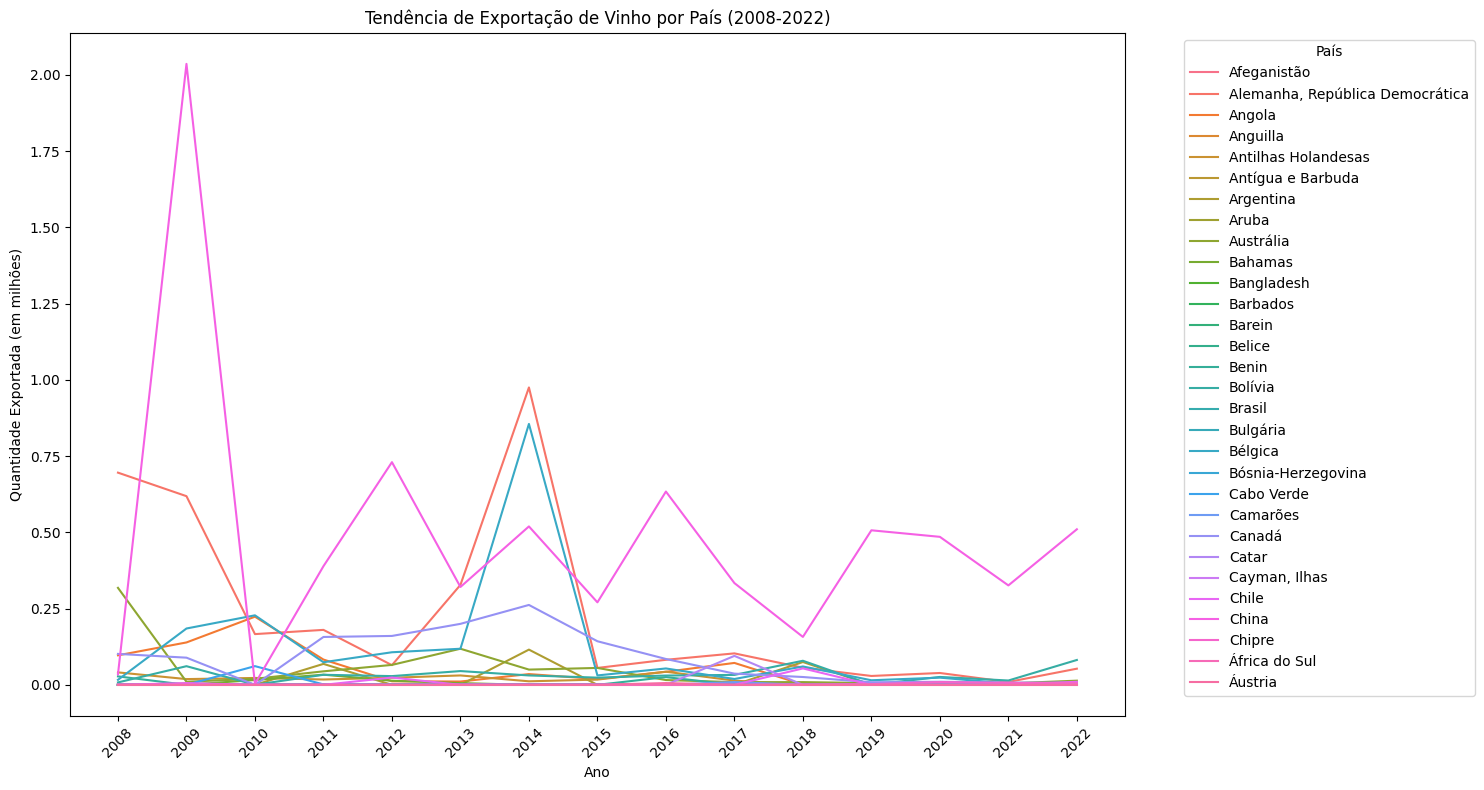

Gráfico para o Grupo 2


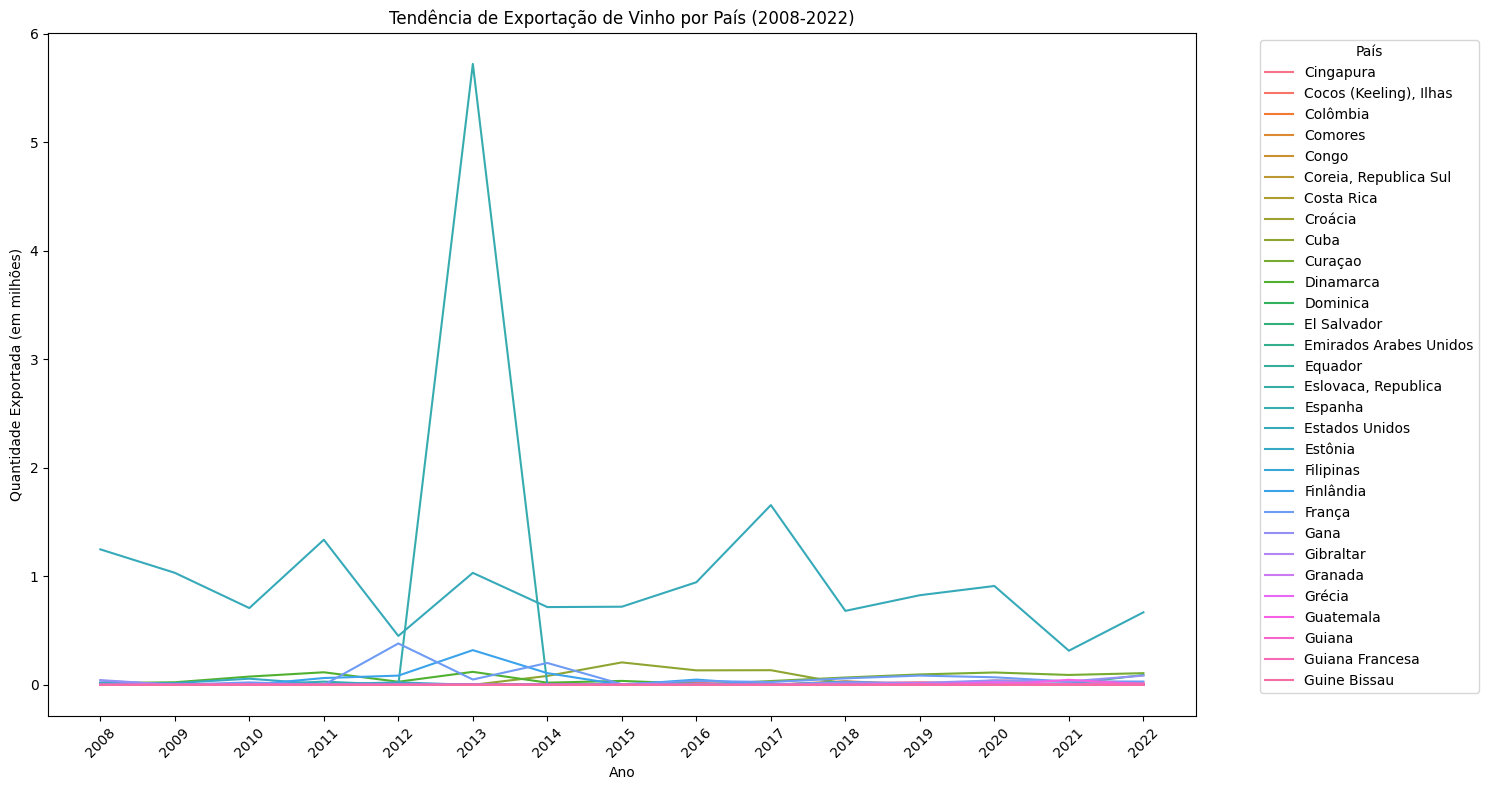

Gráfico para o Grupo 3


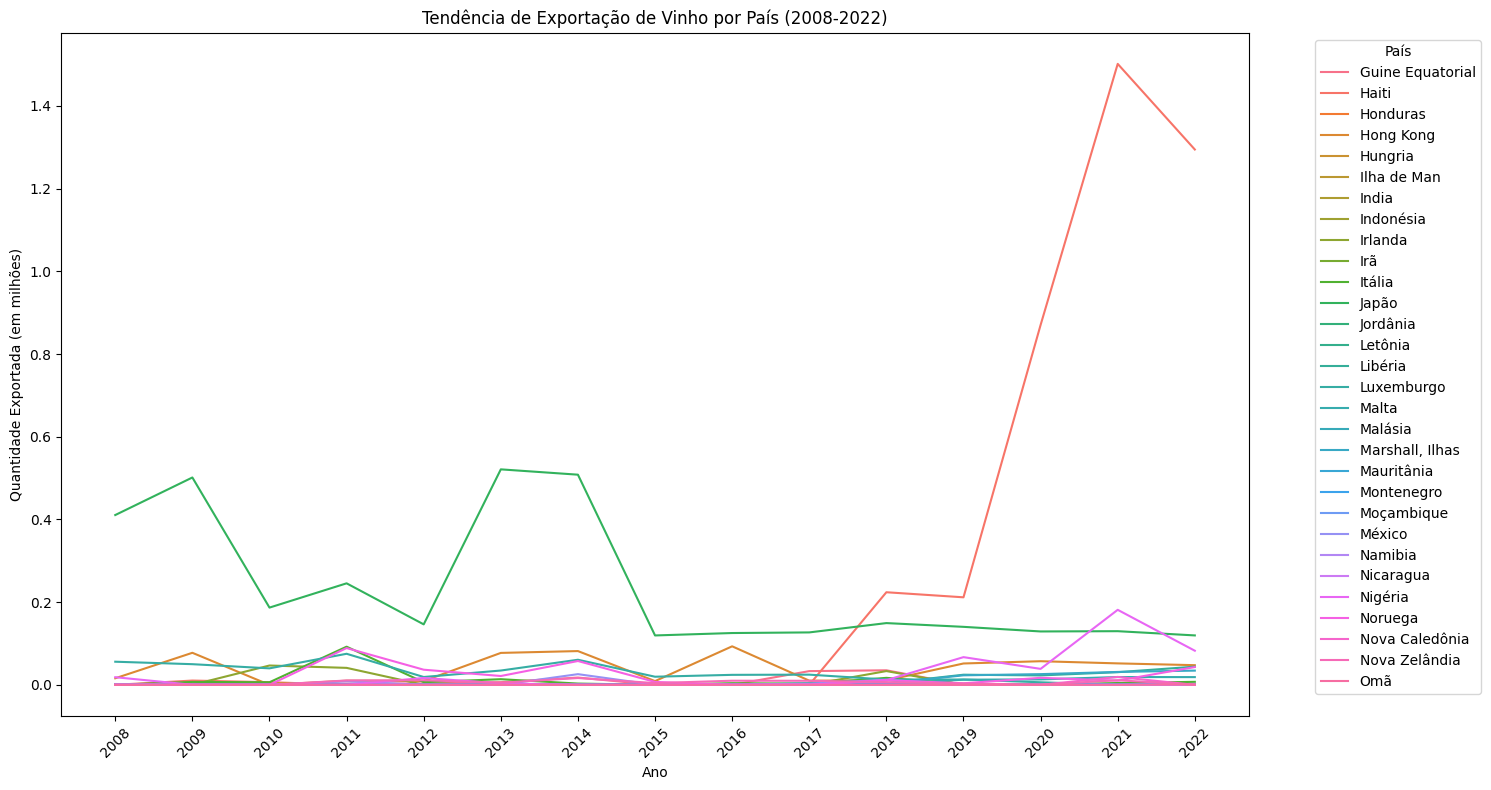

Gráfico para o Grupo 4


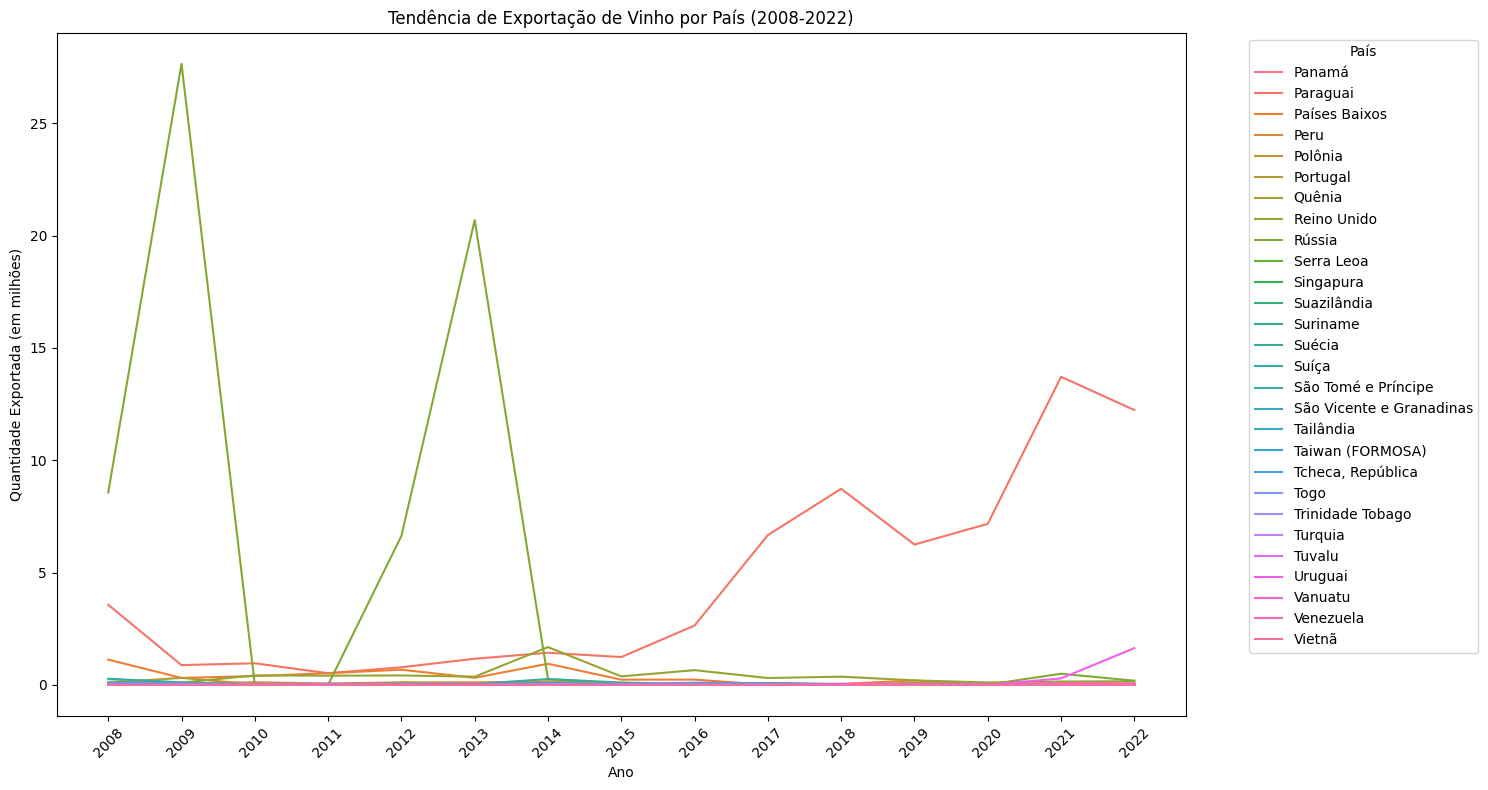

In [91]:
from math import ceil

def plot_wine_export_trends_grouped(data, group_size=30):
    # Obter lista de países únicos
    unique_countries = data["País"].unique()
    
    # Calcular o número total de grupos
    total_groups = ceil(len(unique_countries) / group_size)
    
    # Dividir os países em grupos e plotar gráficos para cada grupo
    for i in range(total_groups):
        # Selecionar um subconjunto de países para o grupo atual
        start_idx = i * group_size
        end_idx = start_idx + group_size
        countries_group = unique_countries[start_idx:end_idx]
        
        # Filtrar os dados para incluir apenas os países do grupo atual
        data_group = data[data["País"].isin(countries_group)]
        
        # Plotar o gráfico para o grupo atual
        print(f"Gráfico para o Grupo {i + 1}")
        plot_wine_export_trends(data_group)
        plt.show()

# Chamar a função para gerar os gráficos agrupados
plot_wine_export_trends_grouped(data)


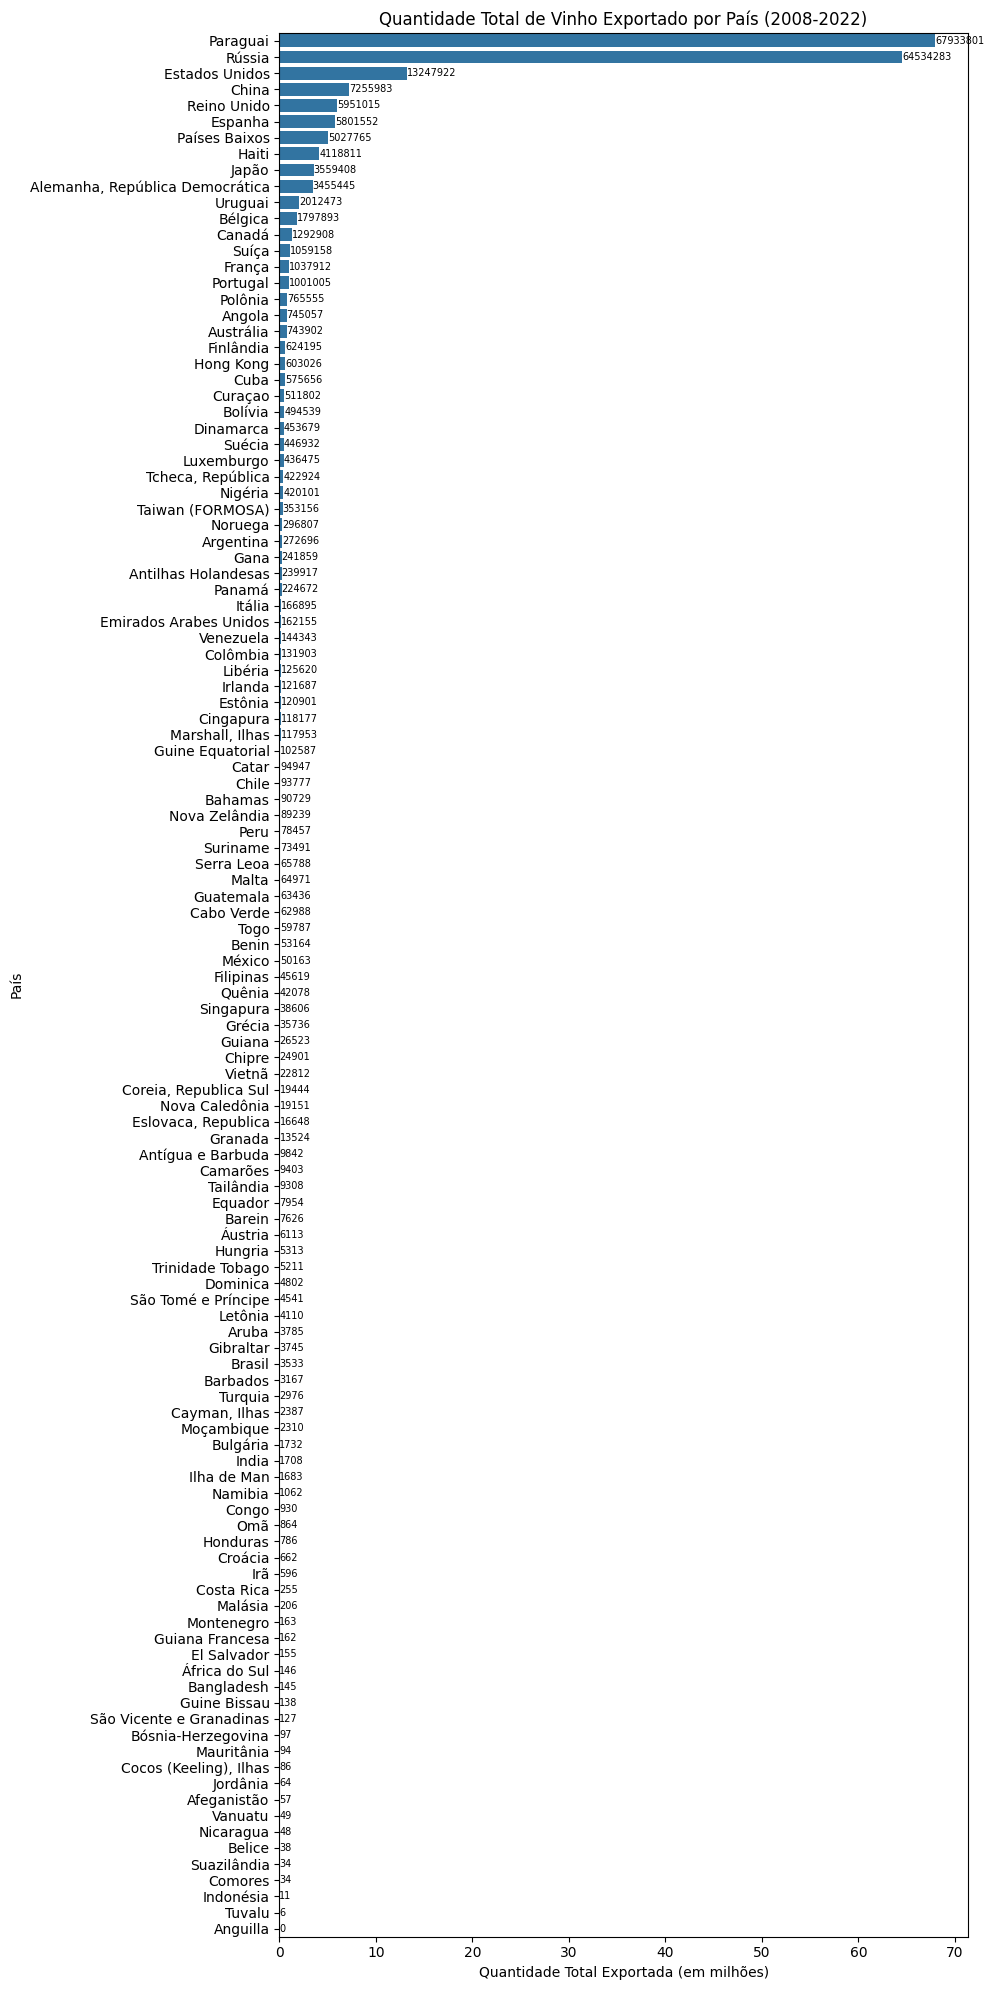

In [95]:

# Calcular a quantidade total de vinho exportado por país
total_exportado_por_pais = data.drop(columns=["Id"]).groupby("País").sum().sum(axis=1)

# Ordenar os resultados em ordem decrescente
total_exportado_por_pais = total_exportado_por_pais.sort_values(ascending=False)

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 20))

# Criar um gráfico de barras horizontal
barplot = sns.barplot(y=total_exportado_por_pais.index, x=total_exportado_por_pais.values / 1_000_000)

# Adicionar os valores absolutos ao lado das barras
for index, value in enumerate(total_exportado_por_pais):
    plt.text(value / 1_000_000, index, f'{value:.0f}', color='black', ha="left", va="center", fontsize = 7)

# Ajustar os títulos e labels
plt.title("Quantidade Total de Vinho Exportado por País (2008-2022)")
plt.ylabel("País")
plt.xlabel("Quantidade Total Exportada (em milhões)")

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()



In [81]:
def total_exportacao_pais(data, pais):
    """
    Calcula o valor total de exportação de vinhos para um país específico ao longo dos anos.
    
    :param data: DataFrame contendo os dados de exportação
    :param pais: Nome do país para o qual calcular o total de exportação
    :return: Valor total de exportação para o país especificado, ou uma mensagem de erro se o país não for encontrado
    """
    # Verificar se o país está no dataset
    if pais not in data["País"].values:
        return f"O país {pais} não foi encontrado no dataset."
    
    # Filtrar os dados para o país especificado
    data_pais = data[data["País"] == pais]
    
    # Somar as quantidades de vinho exportadas para o país
    total_exportacao = data_pais.iloc[:, 2:].sum().sum()
    
    return f"O valor total de exportação de vinhos para o {pais} ao longo dos anos é de {total_exportacao} unidades."

# Substitua 'Brasil' pelo país de seu interesse
print(total_exportacao_pais(data, "Tanzânia"))


O valor total de exportação de vinhos para o Tanzânia ao longo dos anos é de 0 unidades.


# Taxa de crescimento anual 

In [100]:
# 3. Calcular a Taxa de Crescimento Anual
data = data.drop(columns=['Id']).set_index('País')

years = data.columns.astype(int)
num_years = years[-1] - years[0]

# Evitar divisão por zero e log de zero
df_growth = (data.loc[:, str(years[-1])] / (data.loc[:, str(years[0])] + 1e-10))**(1/num_years) - 1

# Ordenar os países pela taxa de crescimento anual de forma decrescente
df_growth_sorted = df_growth.sort_values(ascending=False)

# Mostrar as taxas de crescimento anual
df_growth_sorted.head(10)  # Mostrar os 10 países com as maiores taxas de crescimento anual
#


"""

País
Uruguai            13.391253
Curaçao            10.849704
Venezuela          10.303253
Libéria            10.115594
Noruega            10.098575
Marshall, Ilhas     9.922997
Serra Leoa          9.622263
Colômbia            9.589076
Singapura           9.498358
Malta               9.457803
dtype: float64

In [112]:
# Passo 1: Calcular a quantidade total de vinho exportado por país
total_exportado_por_pais = data.sum(axis=1)

# Ordenar os resultados em ordem decrescente
total_exportado_por_pais_sorted = total_exportado_por_pais.sort_values(ascending=False)

# Mostrar os países com a maior quantidade de vinho exportado
top_exportadores = total_exportado_por_pais_sorted.head()
top_exportadores


# Passo 2: Calcular a taxa de crescimento anual para todos os países
# (isso já foi feito anteriormente, mas vamos recalcular para garantir consistência)

# Calcular a taxa de crescimento anual
df_growth = (data.loc[:, str(years[-1])] / (data.loc[:, str(years[0])] + 1e-10))**(1/num_years) - 1

# Ordenar os países pela taxa de crescimento anual de forma decrescente
df_growth_sorted = df_growth.sort_values(ascending=False)

# Selecionar os países com a maior quantidade de vinho exportado
top_exportadores_growth = df_growth.loc[top_exportadores.index]

# Mostrar as taxas de crescimento anual para os países selecionados
top_exportadores_growth.sort_values(ascending=False)


País
China             0.211861
Paraguai          0.092042
Reino Unido      -0.034103
Estados Unidos   -0.043662
Rússia           -0.239688
dtype: float64

Aqui estão as taxas de crescimento anual para os cinco países com as maiores quantidades totais de vinho exportado:

China: 21,19% (Crescimento)
Paraguai: 9,20% (Crescimento)
Reino Unido: -3,41% (Declínio)
Estados Unidos: -4,37% (Declínio)
Rússia: -23,97% (Declínio significativo)
Análise e Recomendações:
1. China:
A China mostrou um crescimento impressionante nas exportações de vinho ao longo dos anos.
Recomendação: Continuar investindo e talvez até aumentar a presença no mercado chinês, dada a tendência de crescimento positiva.
2. Paraguai:
O Paraguai também mostrou crescimento, embora a uma taxa menor comparada à China.
Recomendação: Manter a presença no mercado, mas também explorar oportunidades para aumentar as exportações, possivelmente por meio de estratégias de marketing ou parcerias locais.
3. Reino Unido, Estados Unidos, e Rússia:
Todos esses países mostraram uma tendência de declínio nas exportações de vinho.
Para o Reino Unido e Estados Unidos, o declínio é moderado.
A Rússia, no entanto, mostrou um declínio significativo.
Recomendação: Reavaliar as estratégias de mercado nesses países. Isso pode incluir investigar as causas do declínio, ajustar os produtos às preferências locais, ou explorar novos canais de distribuição.
Conclusão:
Para os países em crescimento (China e Paraguai), a ênfase deve estar em capitalizar sobre esse momento positivo.
Para os países em declínio, uma análise mais aprofundada é necessária para entender as causas e ajustar as estratégias conforme necessário.

Claro, posso explicar detalhadamente cada linha do código e confirmar o tipo de taxa de crescimento que está sendo calculado.

data = data.drop(columns=['Id']).set_index('País')

Esta linha está removendo a coluna 'Id' e definindo a coluna 'País' como o índice do DataFrame.
years = data.columns.astype(int)

Aqui, estamos pegando os nomes das colunas (que são os anos), convertendo-os para inteiros e armazenando-os na variável 'years'.
num_years = years[-1] - years[0]

Calculamos o número total de anos subtraindo o ano inicial do ano final.
df_growth = (data.loc[:, str(years[-1])] / (data.loc[:, str(years[0])] + 1e-10))**(1/num_years) - 1

Esta é a linha onde a taxa de crescimento é calculada. Vamos quebrá-la:
data.loc[:, str(years[-1])]: Seleciona todos os dados do último ano.
data.loc[:, str(years[0])]: Seleciona todos os dados do primeiro ano.
(data.loc[:, str(years[-1])] / (data.loc[:, str(years[0])] + 1e-10)): Calcula a razão entre os dados do último e do primeiro ano, adicionando 
1
×
1
0
−
10
1×10 
−10
  ao denominador para evitar divisão por zero.
**(1/num_years): Eleva o resultado ao inverso do número total de anos, calculando assim a taxa de crescimento composta.
- 1: Subtrai 1 para obter a taxa de crescimento em termos percentuais.
df_growth_sorted = df_growth.sort_values(ascending=False)

Ordena as taxas de crescimento de forma decrescente.
Conclusão:
O código está calculando a Taxa de Crescimento Composto Anual (CAGR). A CAGR é uma medida útil para entender a taxa de crescimento médio de um investimento ao longo de um período de tempo. Neste caso, estamos usando a CAGR para calcular a taxa média de crescimento anual das exportações de vinho para cada país ao longo do período de tempo analisado.

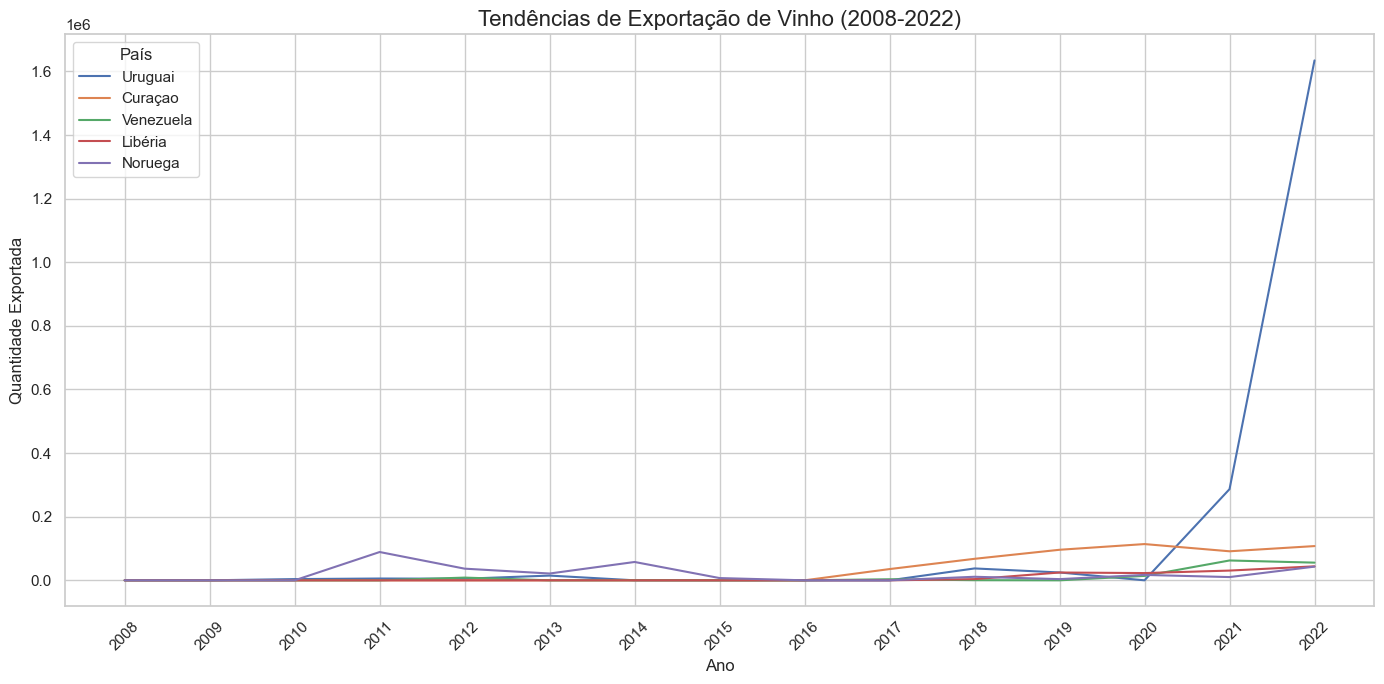

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo dos gráficos
sns.set(style="whitegrid")

# Selecionar os países com as maiores taxas de crescimento anual para visualização
top_countries = df_growth_sorted.head(5).index
df_top_countries = data.loc[top_countries]

# Transpor o DataFrame para facilitar a plotagem
df_top_countries_transposed = df_top_countries.T

# Criar gráficos de linha para visualizar as tendências ao longo do tempo
plt.figure(figsize=(14, 7))
for country in top_countries:
    plt.plot(df_top_countries_transposed.index, df_top_countries_transposed[country], label=country)

# Adicionar títulos e rótulos
plt.title('Tendências de Exportação de Vinho (2008-2022)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade Exportada', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País')
plt.tight_layout()

# Mostrar o gráfico
plt.show()


Análise de Tendências de Longo Prazo (Sem Visualização)
1. Análise Descritiva:
Podemos começar analisando estatísticas descritivas dos dados, como a média, mediana, desvio padrão, mínimo e máximo para cada um dos países selecionados.
Isso nos dará uma ideia geral do nível e da variabilidade das exportações ao longo do tempo.
2. Identificação de Tendências:
Podemos calcular a variação percentual nas exportações de vinho ano a ano para identificar tendências de crescimento ou declínio.
Observar quais anos tiveram as maiores mudanças pode nos ajudar a identificar possíveis pontos de virada ou eventos significativos.
3. Discussão das Tendências:
Com base nessas análises, podemos discutir as possíveis tendências e o que elas podem significar em termos de padrões de consumo e estratégias para a empresa.

In [111]:
# 1. Análise Descritiva dos Países Selecionados
descriptive_stats = df_top_countries.describe()

# 2. Calcular Variação Percentual Ano a Ano para Identificar Tendências
annual_variation = df_top_countries.pct_change(axis=1) * 100

# Mostrar estatísticas descritivas e variação percentual
descriptive_stats, annual_variation.T.describe()


/opt/workspace/personal/posfiap/fase1_tech_challenge/venv/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract

/opt/workspace/personal/posfiap/fase1_tech_challenge/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4658: RuntimeWarning:

invalid value encountered in subtract

/opt/workspace/personal/posfiap/fase1_tech_challenge/venv/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract

/opt/workspace/personal/posfiap/fase1_tech_challenge/venv/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract

/opt/workspace/personal/posfiap/fase1_tech_challenge/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract

/opt/workspace/personal/posfiap/fase1_tech_challenge/venv/lib/python3.10/site-packages/pandas/core/nanops.py:1010: RuntimeWarning:

inv

(       2008  2009         2010          2011          2012          2013  \
 count   5.0   5.0     5.000000      5.000000      5.000000      5.000000   
 mean    0.0   0.0   768.600000  18919.600000  10030.800000   7250.400000   
 std     0.0   0.0  1718.641848  39227.687222  15293.904462  10191.643013   
 min     0.0   0.0     0.000000      0.000000      0.000000      0.000000   
 25%     0.0   0.0     0.000000      0.000000      0.000000      0.000000   
 50%     0.0   0.0     0.000000      0.000000   5014.000000      0.000000   
 75%     0.0   0.0     0.000000   5642.000000   8521.000000  14869.000000   
 max     0.0   0.0  3843.000000  88956.000000  36619.000000  21383.000000   
 
                2014         2015  2016          2017          2018  \
 count      5.000000     5.000000   5.0      5.000000      5.000000   
 mean   11577.800000  1415.800000   0.0   7735.400000  24052.000000   
 std    25751.449963  3165.825043   0.0  15504.623594  28328.013979   
 min        0.000000 

Estatísticas descritivas
As estatísticas descritivas para os cinco países com as maiores taxas de crescimento anual mostram a distribuição das quantidades exportadas de vinhos para cada ano.
Há uma grande variação nos valores exportados ao longo dos anos, com muitos anos registrando valores de exportação de zero. Isso pode indicar interrupções nas exportações ou falta de dados.

Variação Percentual Ano a Ano:

A variação percentual ano a ano ajuda a identificar tendências nas exportações ao longo do tempo.
Vemos que há valores "infinitos" (inf) nas variações. Isso ocorre quando a divisão é feita por zero (por exemplo, quando as exportações aumentam de 0 para um valor positivo). O valor de "infinito" indica um crescimento indefinido nesse cenário.
Também observamos valores negativos, indicando uma diminuição nas exportações em relação ao ano anterior.





In [105]:
# Calcular variação percentual ano a ano para os países selecionados
annual_variation
"""
Uruguai: Observamos várias ocasiões em que as exportações saltaram de 0 para um valor positivo, resultando em um crescimento indefinido (inf). Em outros anos, vemos quedas significativas nas exportações.
Curaçao: Vemos crescimentos consideráveis nas exportações em 2018 e 2019. No entanto, a exportação caiu em 2021.
Venezuela: Assim como o Uruguai, há vários anos em que as exportações saltaram de 0, resultando em um crescimento indefinido. Também observamos quedas significativas em certos anos.
Libéria: Em 2019, houve um aumento significativo nas exportações em comparação com o ano anterior. No entanto, em 2020, houve uma pequena queda.
Noruega: Embora haja flutuações consideráveis ao longo dos anos, observamos um crescimento significativo nas exportações em 2020 e 2022.
Esses padrões de crescimento e declínio podem ser influenciados por vários fatores, como mudanças nas relações comerciais, eventos globais, políticas de importação/exportação, entre outros. Seria útil obter mais contexto ou informações adicionais para entender completamente essas tendências.
"""

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,
Uruguai,NaN,NaN,inf,46.812386,-11.130805,196.549661,-100.000000,NaN,NaN,NaN,inf,-33.891449,-100.000000,inf,470.269629
Curaçao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,91.242115,42.025856,18.673582,-19.914347,17.935259
Venezuela,NaN,NaN,NaN,NaN,inf,-100.000000,inf,-100.000000,NaN,inf,-87.191822,-100.000000,inf,348.819634,-10.885357
Libéria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,552.182012,-7.058632,34.395715,43.594434
Noruega,NaN,NaN,NaN,inf,-58.834705,-41.606816,169.573961,-87.719237,-100.0,NaN,inf,-66.190989,351.101672,-39.987053,321.916062


In [110]:
uruguay_stats = df_top_countries.loc['Uruguai'].describe()
uruguay_stats



count    1.500000e+01
mean     1.341649e+05
std      4.213904e+05
min      0.000000e+00
25%      0.000000e+00
50%      3.843000e+03
75%      1.977300e+04
max      1.634484e+06
Name: Uruguai, dtype: float64

1. Diversificação de Mercados
Diversifique as Exportações: Evite depender excessivamente de um único mercado ou região. A diversificação pode ajudar a mitigar riscos associados a flutuações econômicas ou políticas em países específicos.
2. Monitoramento Contínuo
Acompanhe as Tendências de Mercado: Mantenha-se atualizado sobre as tendências de consumo e preferências em diferentes mercados. Isso pode incluir a preferência por tipos específicos de vinho, práticas de produção sustentável, entre outros.
Monitore as Relações Comerciais: Esteja atento às relações comerciais entre países e quaisquer tarifas ou restrições que possam afetar as exportações.
3. Gestão de Riscos
Prepare-se para Flutuações: Alguns mercados mostraram flutuações significativas nas exportações ao longo dos anos. É importante ter estratégias de gestão de riscos para lidar com essas variações.
Estabeleça Relações Fortes: Construa e mantenha relações fortes com distribuidores e varejistas nos mercados de exportação. Isso pode ajudar a garantir uma presença constante e confiável nesses mercados.
4. Foco em Mercados de Crescimento
Identifique e Invista em Mercados de Crescimento: Considere investir mais recursos em mercados que mostraram crescimento consistente ao longo dos anos.
Avalie os Riscos de Mercados de Alto Crescimento: Alguns mercados que mostraram altas taxas de crescimento podem também ser voláteis. É crucial avaliar os riscos e benefícios antes de aumentar significativamente as exportações para esses mercados.
5. Inovação e Adaptação
Inove e Adapte-se: Esteja pronto para inovar e adaptar os produtos às preferências locais nos mercados de exportação. Isso pode incluir ajustar os sabores do vinho, a embalagem ou as estratégias de marketing.
Conclusão
A gestão das exportações de vinho requer uma abordagem equilibrada, considerando tanto as oportunidades de crescimento quanto os riscos potenciais. Manter a flexibilidade e estar pronto para se adaptar às mudanças do mercado pode ser chave para o sucesso a longo prazo nas exportações.